<img src='./fig/vertical_COMILLAS_COLOR.jpg' style= 'width:70mm'>
<h1 style='font-family: Optima;color:#ecac00'>
Máster en Big Data. Tecnología y Analítica Avanzada (MBD).
<a class="tocSkip">
</h1>

<h1 style='font-family: Optima;color:#ecac00'>
Fundamentos Matemáticos del Análisis de Datos (FMAD). 2022-2023.
<a class="tocSkip">
</h1>

<h1 style='font-family: Optima;color:#ecac00'>
Resúmenes examen Unidad 3
<a class="tocSkip">    
</h1> 

# Imports section

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as scp

# Populations and samples

In [20]:
# Vamos a crear una poblacion ficticia de 158000 individuos y sus edades, 
# para ver cómo podemos coger la muestra de forma que todos los individuos
# estén representados
sns.set(rc={'figure.figsize':(12, 8.5)})

rng = np.random.default_rng(2022) # seed for reproducibility

N = 158000
Ages = np.rint(2 * rng.chisquare(df = 13, size = N)).astype(int)
Population = pd.DataFrame({'Ages':Ages})

print(Population.mean())
Population.head(10)

Ages    26.039519
dtype: float64


,Ages
0,62
1,52
2,29
3,7
4,31
5,13
6,31
7,15
8,30
9,17


In [21]:
# Ahora cogemos una muestra para ver si más o menos la distribución se mantiene
n = 20 # tamaño de la muestra

sample = Population.sample(n)

print("Media de la muestra: ", sample.mean())

sample # The index reflects the row lines in the original data set

Media de la muestra:  Ages    22.85
dtype: float64


,Ages
80593,39
57578,11
156092,20
21128,15
26929,28
84488,22
91393,30
3947,26
67380,15
124494,24


In [22]:
# Cogemos varias muestras del mismo tamaño y calculamos la media de cada una de las muestras
n = 150 # Tamaño de las muestras

n_samples = 10000 # numero de muestras que tomaremos (todas de tamaño 20)

# Cogemos muestras aleatorias y calculamos sus medias.
sample_means = pd.DataFrame([Population.sample(n, replace=True).mean() for item in range(n_samples)], 
                            columns=['Ages'])

# El df que obtenemos es:
sample_means

,Ages
0,25.706667
1,27.053333
2,26.320000
3,25.666667
4,26.433333
...,...
9995,25.193333
9996,25.793333
9997,26.240000
9998,25.940000


## Método de Laplace

In [44]:
# Se trata de hacer un conteo de las veces que se cumple nuestro suceso
# esto nos dará un array booleano (true = se cumple).
# Haciendo la media de nuetro array, podemos sacar la probabilidad.
# EJ: Prob 1/3≤ x ≤2/3

# Semilla para el random
rng = np.random.default_rng(2022) 

# Generamos el array de sucesos
N = 100000

x = rng.random(size = N)
print(x[0:20])
print("-" * 30, "\n")

# Comprobamos nuestro suceso, x en [1/3, 2/3]
x_in_A = (x >= 1/3) & (x <= 2/3)
print(x_in_A[0:20]) # Array booleano
print("-" * 30, "\n")

# Para encontrar la frecuencia relativa (prob) hacemos la media del array
print("The relative frequency (or proportion) of x between 1/3 and 2/3 is ",  x_in_A.mean())

[0.24742606 0.09299006 0.61176337 0.06066207 0.66103343 0.75515778
 0.1108689  0.04305584 0.41441747 0.98862926 0.96919869 0.25697153
 0.55876211 0.24234798 0.32202029 0.89135975 0.94611366 0.72253931
 0.92847437 0.99608701]
------------------------------ 

[False False  True False  True False False False  True False False False
  True False False False False False False False]
------------------------------ 

The relative frequency (or proportion) of x between 1/3 and 2/3 is  0.33375


## Teorema de bayes

In [48]:
#Fórmula escrita en python:
# Probability of incident for each OR
prob_ors = [0.2,0.04]
# OR of which we want to know the probability
or_to_check = 1

def calculate_prob_or_inc(num_or):
    p_or = 1/len(prob_ors)
    p_inc = sum(np.multiply(p_or,prob_ors))
    p_inc_or = prob_ors[num_or-1] 
    prob_or_inc = (p_inc_or*p_or)/p_inc
    return prob_or_inc

p = calculate_prob_or_inc(or_to_check)
print(f"The probability that the report corresponds to a procedure conducted in OR_{or_to_check} is : {p}")

The probability that the report corresponds to a procedure conducted in OR_1 is : 0.8333333333333333


# Gráficos


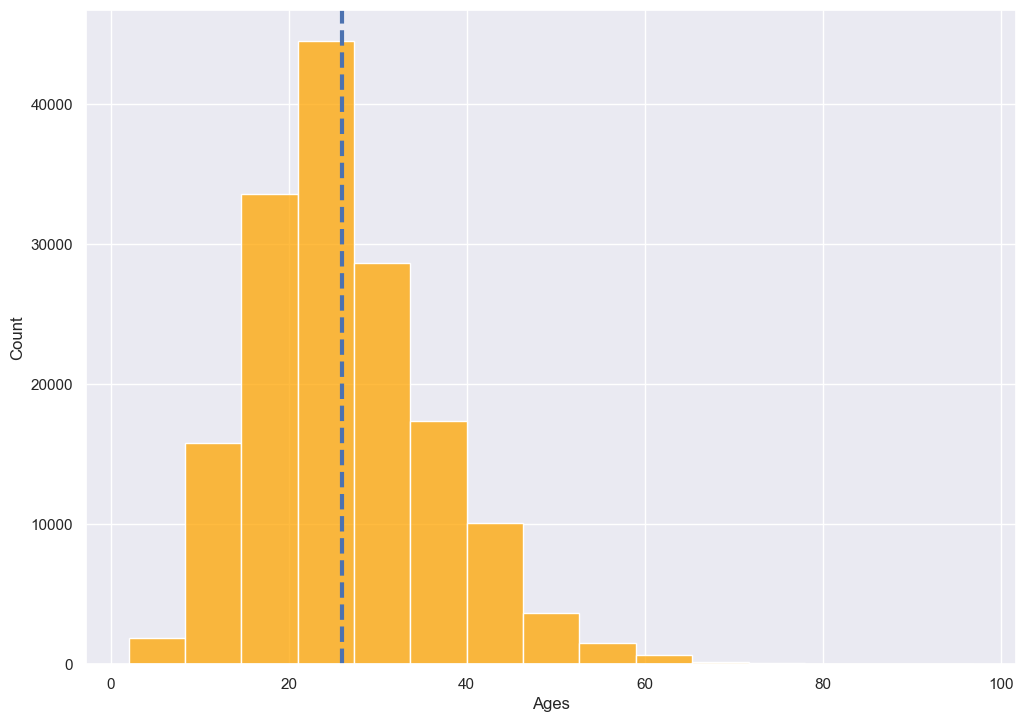

In [18]:
# Pintamos una poblacion ficticia y sus edades.
sns.histplot(data = Population, x = 'Ages', bins=15, color = "orange")
# Para pintar la media de la población.
getPlot = plt.axvline(x = Population.Ages.mean(), linewidth = 3, linestyle='--')

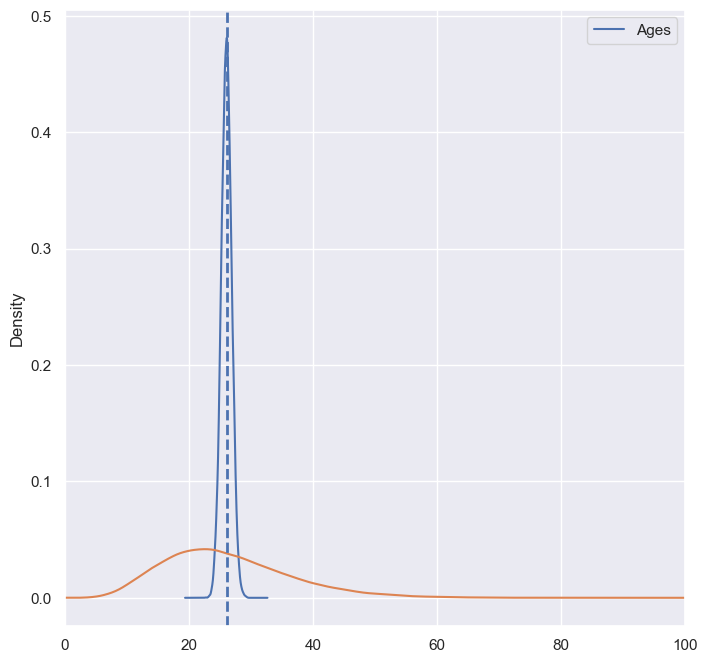

In [23]:
# Pintamos la distribución de las medias de las N muestras aleatorias 
sns.set(rc={'figure.figsize':(8, 8)})
sample_means.plot.density()# Curva azul, imprimimos la muestra que hemos tomado, al tomarla de la forma que hemos hecho arriba, está cerca de la media.
Population.Ages.plot.density()# Curva naranja, imprimimos la poblacion completa
plt.axvline(x = Population.Ages.mean(), linewidth = 2, linestyle='--')
getPlot = plt.xlim((0, 100))
# Con las medias muestrales, siempre aparece la curva normal.

# Ejercicios

### Generar una poblacion y pintar la curva de la poblacion y la de las medias

           x
0  -1.763000
1  -1.342294
2  -1.126859
3  -1.544897
4  -1.396201
..       ...
95 -1.068952
96 -1.217071
97 -1.721149
98 -1.399646
99 -2.126706

[100 rows x 1 columns]


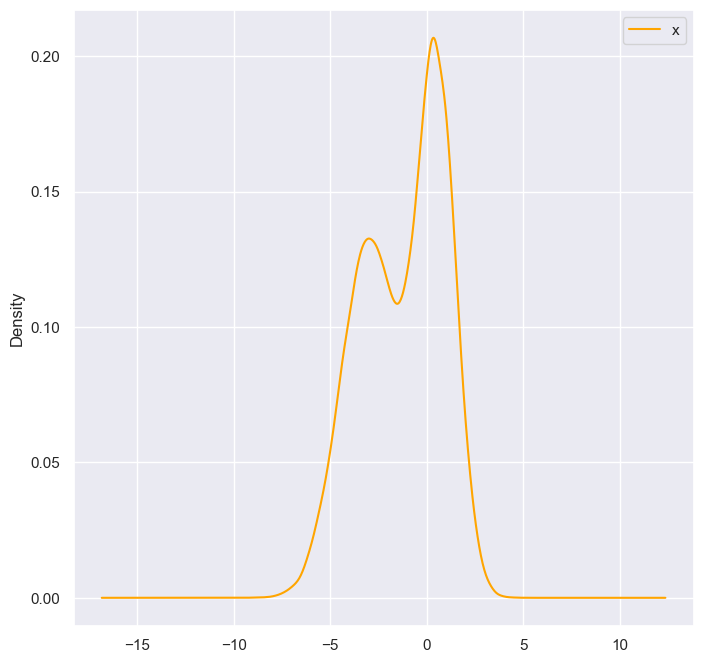

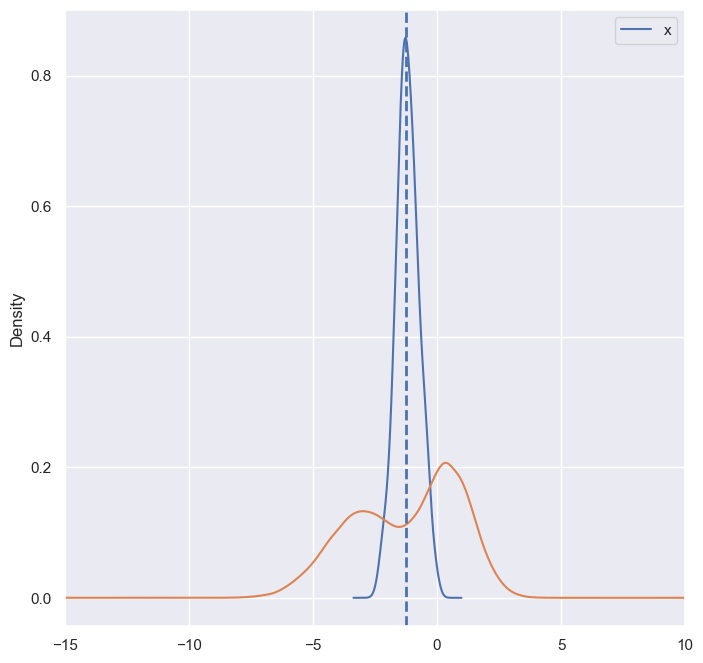

In [32]:
# Generar una poblacion y pintar la curva de la poblacion y la de las medias
# Exercise S03-001

sns.set(rc={'figure.figsize':(8, 8)})

# Create the population
rng = np.random.default_rng(2022) # seed for reproducibility
N = 100000
x = np.concatenate((1.5 * rng.normal(loc = -2, size = N), rng.normal(loc = 0.5, size = N)))
Population2 = pd.DataFrame({'x':x})

# Curva de densidad de la poblacion
#plot0 = plt.figure(0)
plot0 = Population2.plot.density(color='Orange')

# Ahora cogemos muestras con remplazamiento
n = 20 #Tamaño de la muestra
n_samples = 100 # numero de muestras

sample_means = pd.DataFrame([Population2.sample(n, replace=True).mean() for _ in range(n_samples)],
                           columns=["x"])

# Ahora pintamos las medias de las muestras, sobre la poblacion inicial y su media
#plot1 = plt.figure(1)
sample_means.plot.density()# Curva azul, imprimimos la muestra que hemos tomado, al tomarla de la forma que hemos hecho arriba, está cerca de la media.
Population2.x.plot.density()# Curva naranja, imprimimos la poblacion completa
plt.axvline(x = Population2.x.mean(), linewidth = 2, linestyle='--')
getPlot = plt.xlim((-15, 10))

### The problems of the Chevalier de Méré

In [36]:
# Exercise S03-002a -- To get at least one six in four rolls of a single dice

# Semilla del random 
rng = np.random.default_rng(2022) 

# Numero de tiradas
N = 100000

# Generamos un array de numpy para cada una de las tiradas (N) con 4 cols.
# Cada fila representa un "juego", cada columna una tirada en el juego.
game1 = rng.integers(low = 1, high = 7, size = (N, 4))


# These are the first few games
print("Primeros juegos: ")
print(game1[0:10, :])
print("-" * 30, "\n")

# Comprobamos cada tirada para ver si hemos obtenido algun 6
game1_is_6 = (game1 == 6)
# The first part of the output of this step is
print("Comprobacion de 6: ")
print(game1_is_6[0:10, :])
print("-" * 30, "\n")

# Contamos el numero de apariciones del 6 en cada uno de los juegos (filas)
game1_number_of_6 = game1_is_6.sum(axis=1)
# Compare with the previous step to check that the count is ok
print("Conteo de 6 por fila: ")
print(game1_number_of_6[0:10])
print("-" * 30, "\n")

# Ahora se puede hacer un recuento de cuántas veces se ha ganado el juego 
game1_win = game1_number_of_6 > 0 
print("Recuento de veces ganadas: ")
print(game1_win[0:10])
print("-" * 30, "\n")

# We can finally get the relative frequencies of win and lose at this game
table = np.array(np.unique(game1_win, return_counts=True)) # para tener partidas ganafdas y perdidas, si hacemos un sum del array game1_win obtendremos el mismo resultado, ya que es el valor que nos interesa
relfreqLose = table[1, 0] / N
relfreqWin = table[1, 1] / N
print("The relative frequency of winning the first game is ", relfreqWin)
print("while 2 / 3 = ", 0.6666, " approx.")

Primeros juegos: 
[[5 2 5 1]
 [2 4 6 1]
 [1 4 6 5]
 [5 1 4 1]
 [1 3 6 6]
 [3 6 1 2]
 [4 4 3 2]
 [1 2 2 6]
 [3 6 6 5]
 [1 6 5 6]]
------------------------------ 

Comprobacion de 6: 
[[False False False False]
 [False False  True False]
 [False False  True False]
 [False False False False]
 [False False  True  True]
 [False  True False False]
 [False False False False]
 [False False False  True]
 [False  True  True False]
 [False  True False  True]]
------------------------------ 

Conteo de 6 por fila: 
[0 1 1 0 2 1 0 1 2 2]
------------------------------ 

Recuento de veces ganadas: 
[False  True  True False  True  True False  True  True  True]
------------------------------ 

51559
The relative frequency of winning the first game is  0.51559
while 2 / 3 =  0.6666  approx.


In [39]:
# to get at least a double six in 24 rolls of two dice
# Exercise S03-002b

# Semilla del random 
rng = np.random.default_rng(2022) 

# NUmero de juegos para la simulacion
N = 100000

# We generate the 24 * N games as a NumPy array of N rows and 24 columns.
# Each row represents a game, each column the roll of two dice.
# Rolling two dice results are coded from 1 to 36, with 36 is a double 6.
game2 = rng.integers(low = 1, high = 37, size = (N, 24))

# These are the first few games
print("Resultado de los primeros juegos")
print(game2[0:10, :])
print("-" * 30, "\n")

# Next we check every dice roll to see if we got a six
game2_is_36 = (game2 == 36)
# The first part of the output of this step is
print("¿Hay doble 6 (36)?")
print(game2_is_36[0:10, :])
print("-" * 30, "\n")

# Now we count the number of appearances of six in each row/game
game2_number_of_36 = game2_is_36.sum(axis=1)
# Compare with the previous step to check that the count is ok
print("Conteo de doble 6 por fila")
print(game2_number_of_36[0:10])
print("-" * 30, "\n")

# And now we can see if the game is win or lose (0 appearances of 6) 
game2_win = game2_number_of_36 > 0 
print("Recuento de veces ganadas (1 o más dobles 6)")
print(game2_win[0:10])
print("-" * 30, "\n")

# We can finally get the relative frequencies of win and lose at this game
table = np.array(np.unique(game2_win, return_counts=True))
relfreqLose = table[1, 0] / N
relfreqWin = table[1, 1] / N
print("The relative frequency of winning the second game is ", relfreqWin)
print("while 2 / 3 = ", 0.6666, " approx.")

Resultado de los primeros juegos
[[26  9 27  4  7 23 34  3  3 24 32 28 30  4 21  2  4 15 32 36 14 35  1 10]
 [23 21 14  9  4 12 12 33 13 35 33 27  2 34 26 36  1  9 23  3 17 35 24 24]
 [26 12  4  4  2  8 32  4 22  2 35  8  5  3 32 13 20  5  1 22 33  1 31 11]
 [ 6  7  9  6  5 36  6 11 17 17  5 11 16 35  8 22 11 18 16 26 24 16 24  1]
 [30 26 20 24  9  4  1 10 13 21 28 26 23 22 36  4  1 25 31 26 32 24 35 17]
 [33  2 33 19 29 18  5 18 17 33 28 19  4 20 10 18 31  4 34 17  7  6 22  1]
 [31 11  9 21  8 32 12  8 28 19 16 19 34  2 22 33 15 24 25 33  8  5 35 36]
 [ 8 20 26 24 18 14 15 27  9 24 16 31 19  4 31 23 30 30 35 26 14 32  1 27]
 [10 20 18 15  1 28 28 33 25  9 21 27 22 21 28 24 21 28 34 13 28 31 30 24]
 [35  2 24 22 11 22  9  3  4  3  3 17 19 19 17  2 22 33 19 36 19 29 16 13]]
------------------------------ 

¿Hay doble 6 (36)?
[[False False False False False False False False False False False False
  False False False False False False False  True False False False False]
 [False False F

### Birthday paradox

In [43]:

# Semilla para random
rng = np.random.default_rng(2022) 

# number of people in the room
n = 150

# We will repeat the experiment a large number of times 
# Think of N different rooms, each with n people in i
N = 10

max_coincidence = np.array([], dtype = np.int64)
for i in range(N):
    room = rng.integers(low = 1, high = 367, size = n)
    day, brthd_count = np.unique(room, return_counts=True) # Hacemos una tabla de frecuencias de los días y sus apariciones, para ver si alguna es mayor que 1 (lo que significaría que se repite el cumpleaños)
    max_coincidence = np.append(max_coincidence, brthd_count.max()) # Nos guardamos el máximo de la tabla de frecuencias
    coincide_2 = max_coincidence > 1 # si el maximo es mayor que 1, significa que hay al menos un cumple que se repite
    
    

print("With ", n, " people in the room the relative frequency of two or more birthdays \
coincidence is: ", coincide_2.mean())

With  150  people in the room the relative frequency of two or more birthdays coincidence is:  1.0


### Prob de pin de 4 digitos con  nums repetidos

In [45]:
# Solucion del profesor
# 1 - P(no repeats) = 1 - (10 · 9 · 8 · 7) / 10000)


theoretical_prob = 1 - (10 * 9 * 8 * 7) / 10000
print(theoretical_prob)
print("--"*5, "\n")

# Now we use Python to *enumerate* the elementary events (pins) with repeated digits.
pins = np.array([[a, b, c, d] for a in range(0, 10) \
        for b in range(0, 10) \
        for c in range(0, 10) \
        for d in range(0, 10)])

print("These are the first few pins:")
print(pins[0:4])
print("and these are the last ones:")
print(pins[-4:])
print("--"*5, "\n")

print("We look for the greatest frequency in each pin\n")
digits_max_freq = [np.unique(pin, return_counts=True)[1].max() for pin in pins]
print(pins[550:570])
print("\n")
print(digits_max_freq[550:570])
print("--"*5, "\n")

print("If this is bigger than one, there are repeated digits\n")
pin_has_repeats = [rpt > 1 for rpt in digits_max_freq]
print(pin_has_repeats[550:570])
print("--"*5, "\n")

print("Finally, the probability is")
np.mean(pin_has_repeats)

0.496
---------- 

These are the first few pins:
[[0 0 0 0]
 [0 0 0 1]
 [0 0 0 2]
 [0 0 0 3]]
and these are the last ones:
[[9 9 9 6]
 [9 9 9 7]
 [9 9 9 8]
 [9 9 9 9]]
---------- 

We look for the greatest frequency in each pin

[[0 5 5 0]
 [0 5 5 1]
 [0 5 5 2]
 [0 5 5 3]
 [0 5 5 4]
 [0 5 5 5]
 [0 5 5 6]
 [0 5 5 7]
 [0 5 5 8]
 [0 5 5 9]
 [0 5 6 0]
 [0 5 6 1]
 [0 5 6 2]
 [0 5 6 3]
 [0 5 6 4]
 [0 5 6 5]
 [0 5 6 6]
 [0 5 6 7]
 [0 5 6 8]
 [0 5 6 9]]


[2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1]
---------- 

If this is bigger than one, there are repeated digits

[True, True, True, True, True, True, True, True, True, True, True, False, False, False, False, True, True, False, False, False]
---------- 

Finally, the probability is


0.496

In [46]:
# Mi solución
# Number of times the experiment is repeated
M = 100
# We generate a dataframe with 4 columns, corresponding to each pin number, and M rows, corresponding to each experiment.
df = pd.DataFrame(np.random.default_rng(1234).integers(low = 1, high = 9, size = (M,4)))

# We count the number of times a number is repeated in each experiment.
df2 = df.apply(pd.Series.duplicated, axis=1)
df3 = df2.any(axis=1)

# By calculating the mean of a Boolean array we can get the probability
p = df3.mean()
print(f"The probability that a pin has one or more repeated digits is {p}.")

The probability that a pin has one or more repeated digits is 0.54.
